In [32]:
import yfinance as yf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [33]:
tsla = yf.Ticker("TSLA")

In [34]:
df_base = tsla.recommendations.reset_index() #Alyways have original df to refer back to 
df = df_base.copy()
df_base.head()

,Date,Firm,To Grade,From Grade,Action
0,2012-02-16 07:42:00,JP Morgan,Overweight,,main
1,2012-02-16 13:53:00,Wunderlich,Hold,,down
2,2012-02-17 06:17:00,Oxen Group,Buy,,init
3,2012-03-26 07:31:00,Wunderlich,Buy,,up
4,2012-05-22 05:57:00,Maxim Group,Buy,,init


In [35]:
import datetime as dt
df['Date'] = df['Date'].dt.floor('D') # Remove seconds
df['To Grade'].value_counts()

Neutral              56
Buy                  46
Outperform           34
Hold                 28
Underperform         28
Sell                 25
Underweight          22
Overweight           22
Equal-Weight         14
Market Perform        6
Market Outperform     6
Sector Perform        4
                      3
Perform               1
Peer Perform          1
Sector Weight         1
In-Line               1
Underperformer        1
Name: To Grade, dtype: int64

In [36]:
#A lot of these terms mean the same thing, so let's group them 
df['To Grade'] = np.where((df['To Grade']== 'Outperform')|(df['To Grade']== 'Overweight')| (df['To Grade']== 'Strong Buy'),(
'Buy'),df['To Grade'])

In [37]:
df['To Grade'] = np.where((df['To Grade']== 'Neutral')|(df['To Grade']== 'Market Perform')| (df['To Grade']== 'Equal-Weight'),(
'Hold'),df['To Grade'])

In [38]:
df['To Grade'] = np.where((df['To Grade']== 'Underweight')|(df['To Grade']== 'Underperform'),(
'Sell'),df['To Grade'])

In [39]:
df['To Grade'].value_counts()

Hold                 104
Buy                  102
Sell                  75
Market Outperform      6
Sector Perform         4
                       3
In-Line                1
Peer Perform           1
Underperformer         1
Sector Weight          1
Perform                1
Name: To Grade, dtype: int64

In [40]:
df = df.loc[(df['To Grade'] == 'Hold')|(df['To Grade']=='Buy')|(df['To Grade']=='Sell')].copy()

In [41]:
df['Firm'].value_counts()

Morgan Stanley              28
Wedbush                     18
Jefferies                   18
JP Morgan                   16
Baird                       15
Goldman Sachs               15
Deutsche Bank               15
Canaccord Genuity           12
Barclays                    11
Credit Suisse               10
UBS                          9
Bank of America              8
Standpoint Research          7
RBC Capital                  7
B of A Securities            6
Citigroup                    6
Piper Sandler                6
Oppenheimer                  6
Roth Capital                 5
Stifel Nicolaus              4
Cowen & Co.                  4
Nomura                       4
PiperJaffray                 3
Pacific Crest                3
Wunderlich                   3
JMP Securities               3
New Street                   3
Argus Research               3
S&P Capital IQ               2
Argus                        2
Exane BNP Paribas            2
CLSA                         2
Global E

In [42]:
#Let's only evaluate firms with at least 10 recommendations
df = df.groupby("Firm").filter(lambda x: len(x) > 9).copy()
df['Firm'].value_counts()

Morgan Stanley       28
Jefferies            18
Wedbush              18
JP Morgan            16
Deutsche Bank        15
Baird                15
Goldman Sachs        15
Canaccord Genuity    12
Barclays             11
Credit Suisse        10
Name: Firm, dtype: int64

In [43]:
df['Action'].value_counts()

main    116
down     19
up       14
init      5
reit      4
Name: Action, dtype: int64

In [44]:
#Create df where analysts changed their positions
df_change = df.loc[df['From Grade'] != ''].head()
df_change.head()

,Date,Firm,To Grade,From Grade,Action
6,2012-09-17,Morgan Stanley,Buy,Neutral,up
19,2013-05-09,Goldman Sachs,Hold,Buy,down
31,2013-07-26,Deutsche Bank,Buy,Hold,up
32,2013-08-08,Barclays,Hold,Overweight,down
40,2013-10-02,Baird,Hold,Buy,down


### Our df now has simplified recommendations and only companies that frequently provide recommendations for TSLA

### Time to bring in historical stock data so we can evaluate the recommendations

In [45]:
df.describe()

,Date,Firm,To Grade,From Grade,Action
count,158,158,158,158,158
unique,129,10,3,11,5
top,2016-05-05 00:00:00,Morgan Stanley,Hold,,main
freq,4,28,69,111,116
first,2012-02-16 00:00:00,NaN,NaN,NaN,NaN
last,2020-07-23 00:00:00,NaN,NaN,NaN,NaN


In [46]:
prices = yf.download('TSLA', start='2012-01-01', end='2020-07-24', interval = '1d', progress=False)
prices.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2012-01-03,28.940001,29.500000,27.650000,28.080000,28.080000,928100
2012-01-04,28.209999,28.670000,27.500000,27.709999,27.709999,630100
2012-01-05,27.760000,27.930000,26.850000,27.120001,27.120001,1005500
2012-01-06,27.200001,27.790001,26.410000,26.910000,26.910000,986300
2012-01-09,27.000000,27.490000,26.120001,27.250000,27.250000,897000


In [47]:
df_buy = df.loc[df['To Grade']=='Buy']
df_sell = df.loc[df['To Grade']=='Sell']

In [53]:
#get buy and sell in prices df so we can scatter plot them on the price plot
plot_buy = prices.merge(df_buy,on='Date', how = 'left')
plot_sell = prices.merge(df_sell,on='Date', how = 'left')


In [54]:
plot_buy = plot_buy.loc[plot_buy['To Grade']=='Buy']
plot_sell = plot_sell.loc[plot_sell['To Grade']=='Sell']

plot

,Date,Open,High,Low,Close,Adj Close,Volume,Firm,To Grade,From Grade,Action
31,2012-02-16,33.500000,34.509998,32.540001,34.180000,34.180000,2219700,JP Morgan,Buy,,main
178,2012-09-17,32.349998,32.779999,31.510000,32.540001,32.540001,3212800,Morgan Stanley,Buy,Neutral,up
184,2012-09-25,28.620001,29.480000,27.530001,27.660000,27.660000,5680400,Goldman Sachs,Buy,,main
185,2012-09-26,27.660000,28.400000,27.480000,27.540001,27.540001,1527200,Jefferies,Buy,,main
193,2012-10-08,28.860001,29.400000,28.610001,29.250000,29.250000,889700,Morgan Stanley,Buy,,main


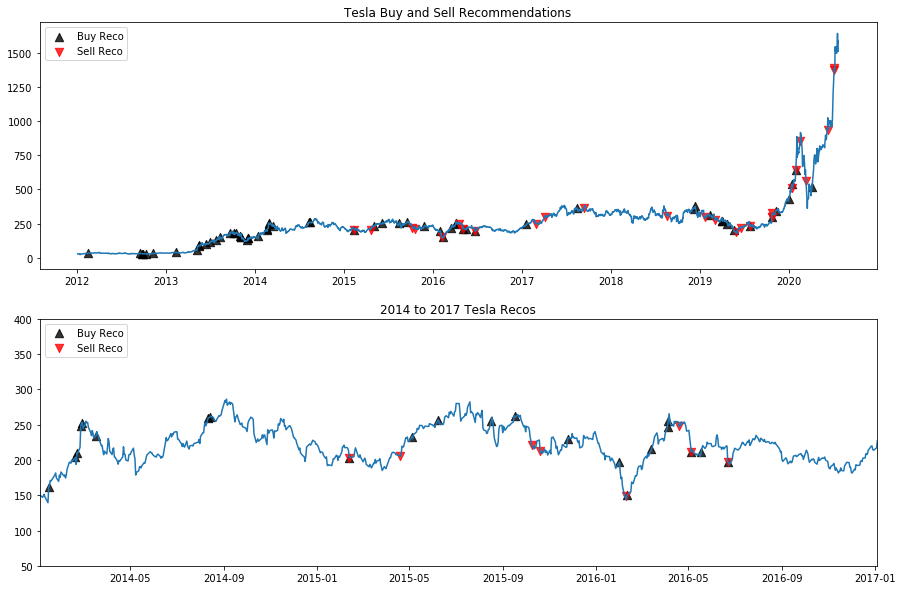

In [76]:
fig = plt.figure(figsize = (15,10))

ax1 = plt.subplot(2,1,1)
plt.plot(prices.index, prices.Close)
plt.scatter(x = plot_buy.Date, y = plot_buy.Close, color = 'black', marker = '^', label = 'Buy Reco',s=70, alpha = 0.8)
plt.scatter(x = plot_sell.Date, y = plot_sell.Close, color = 'red', marker = 'v', label = 'Sell Reco',s=70, alpha=0.8)
ax1.set_title('Tesla Buy and Sell Recommendations')

ax2 = plt.subplot(2,1,2)
plt.plot(prices.index,prices.Close)
plt.scatter(x = plot_buy.Date, y = plot_buy.Close, color = 'black', marker = '^', label = 'Buy Reco',s=70, alpha=0.8)
plt.scatter(x = plot_sell.Date, y = plot_sell.Close, color = 'red', marker = 'v', label = 'Sell Reco', alpha = 0.8, s =70)
ax2.set_title('2014 to 2017 Tesla Recos')

datemin = dt.date(2014, 1, 2)
datemax = dt.date(2017, 1, 3)
ax2.set_xlim(datemin, datemax)
ax2.set_ylim(50,400)

ax1.legend()
ax2.legend(loc=2)